In [1]:
import os

import matplotlib.pyplot as plt

import plotters
import reader
from DataTransformer import DataTransformer
import seaborn as sns
import plotters_help
import pandas as pd

%load_ext autoreload
%autoreload 2

os.chdir('../') # work from project root so the reader gets the right paths
print(os.getcwd())

/home/linus/Dokumente/Studium/Master/Amsterdam/02_DisSys/Project/CloudScheduling/plotter_4_cloud


In [2]:
export_base_path = "/home/linus/Dropbox/Apps/Overleaf/DistributedSystems_Group2/graphs/"

In [3]:
data = reader.sort_dfs(["ELoP", "HEFT", "MinMin", "MaxMin", "ACO", "Random"])
transformer = DataTransformer(data)

In [4]:
sns.set(font_scale = 1.4)

# ECDF for makespan

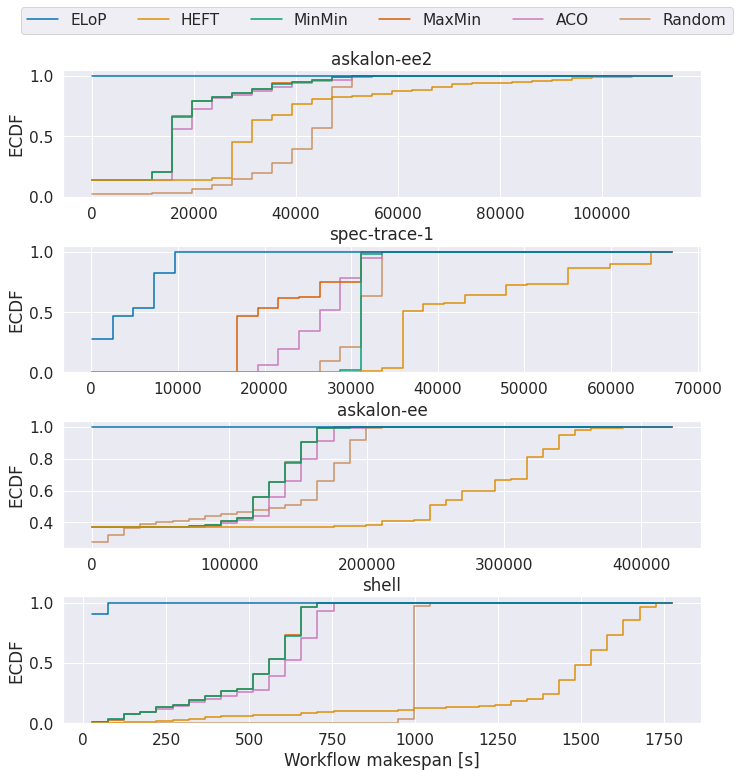

In [25]:
ecdf_data, ecdf_meta = transformer.to_makespan_cdf_per_workflow("homogeneous", "scale2", export_base_path + "exp_workload_ecdf.pdf")

plotters.create_makespan_cdf_order_policy(ecdf_data, ecdf_meta) # although created for exp 1, this works here just fine :)

# Electricity

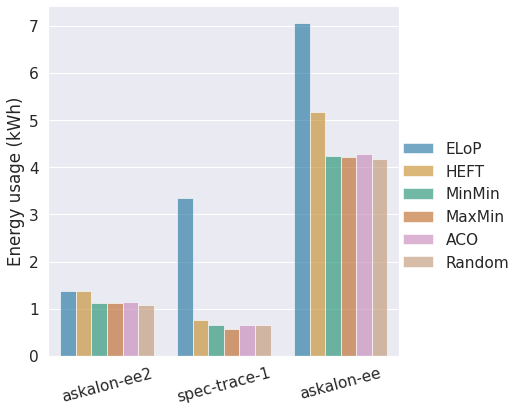

In [6]:
electricity_data, electricity_meta = transformer.to_energy_exp_workload("homogeneous", "scale2",export_base_path + "exp_workload_electricity.pdf")

plotters.create_energy_plot_workload(electricity_data, electricity_meta)

# Utilization

In [7]:
utilization_data, utilization_meta = transformer.to_utilization_table_workload("homogeneous", "scale2", export_base_path + "exp_workload_utilization.png")

pd.options.display.float_format = "{:,.2f}".format
with open(export_base_path + "exp_workload_utilization.tex", "w") as text_file:
    text_file.write(plotters_help.latex_with_lines(utilization_data))
utilization_data

,askalon-ee2,spec-trace-1,askalon-ee,shell
policy,,,,
ELoP,0.24,0.04,0.17,0.01
HEFT,0.40,0.40,0.37,0.37
MinMin,0.78,0.78,0.67,0.72
MaxMin,0.78,0.78,0.67,0.72
ACO,0.74,0.73,0.64,0.68
Random,0.78,0.77,0.73,0.72


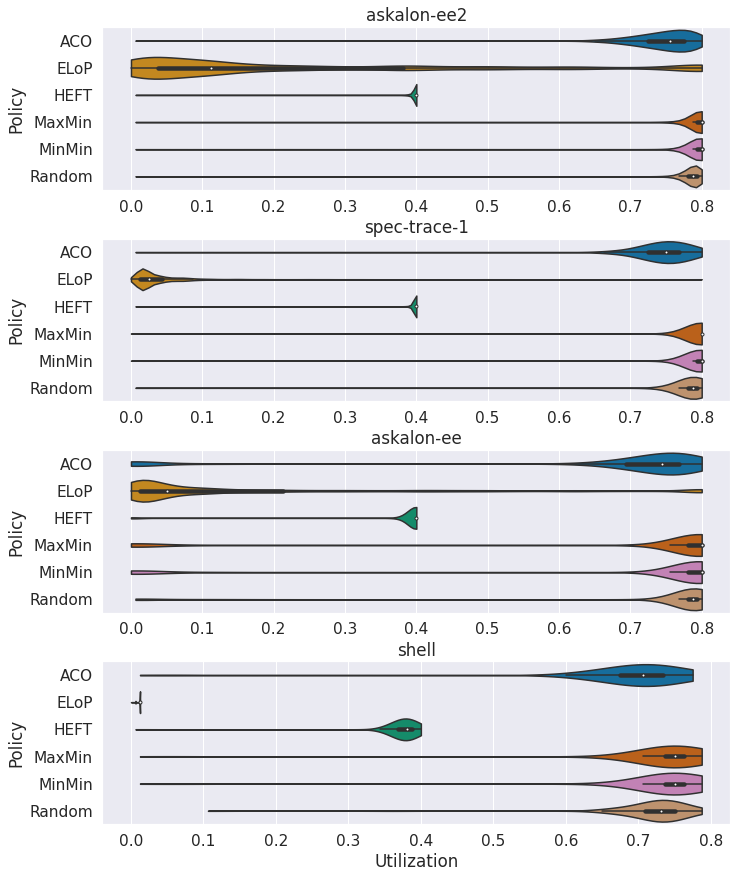

In [8]:
utilization_data_violin, utilization_meta_violin = transformer.to_utilization_violin_workload("homogeneous", "scale2", export_base_path + "exp_workload_utilization_violin.pdf")
plotters.create_utilization_violin_workload(utilization_data_violin, utilization_meta_violin)